In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('fisheries_data.csv')
df2 = pd.read_excel('Value Sheet.xlsx',skiprows=1)

In [3]:
df.head()

,SI.No,Age,District,Market Place,Market Type,Education,Average Per day sales,Do you have bank Account Bank Acct,Bank Name,Phone Type,Operate SMS,Do you have Aadhar Card,Do you have Debit Card,have you used mobile banking Services,Heard about digital Banking,Has any customer request for digital payment,Interested to undergo traning for Mobile Banking,Willingness to use Mobile Banking in near future
0,1,45,1,1.0,0.0,10.0,25000.0,1,5,2,1.0,1,1,0,1,0,1,1
1,2,55,1,2.0,1.0,0.0,20000.0,1,3,2,0.0,1,0,0,0,0,0,0
2,3,60,1,2.0,1.0,0.0,20000.0,1,6,2,NaN,1,0,0,0,0,0,0
3,4,49,1,NaN,1.0,6.0,25000.0,1,3,2,NaN,1,0,0,1,0,1,0
4,5,50,1,2.0,1.0,1.0,20000.0,1,3,2,0.0,1,0,0,1,0,1,0


In [4]:
df2.head()

,MARKET,Unnamed: 1,Unnamed: 2,BANK,Unnamed: 4,Unnamed: 5,MOBILE,Unnamed: 7,Unnamed: 8,Boolean,Unnamed: 10,Unnamed: 11,District,Unnamed: 13
0,Value,PLACE NAME,NaN,Value,Bank Name,NaN,Value,Mobile Type,NaN,1.0,Yes,NaN,1.0,Udupi
1,1,Kodi Bengre,NaN,1,Canara,NaN,1,Smartphone,NaN,0.0,No,NaN,2.0,Dakshina Kannada
2,2,Malpe,NaN,2,cooperative bank,NaN,2,Featured,NaN,NaN,NaN,NaN,3.0,Uttara Kannada
3,3,Udupi Fish Market,NaN,3,Corporation Bank,NaN,3,No,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Shirva,NaN,4,Mahalaxmi Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Read CSV file and fill the missing value

df['Market Place'].fillna(method='ffill', inplace=True)
df['Operate SMS'].fillna(method='bfill', inplace=True)
df['Market Type'].fillna(method='ffill', inplace=True)
df['Education'].fillna(method='ffill', inplace=True)

In [6]:
df.head()

,SI.No,Age,District,Market Place,Market Type,Education,Average Per day sales,Do you have bank Account Bank Acct,Bank Name,Phone Type,Operate SMS,Do you have Aadhar Card,Do you have Debit Card,have you used mobile banking Services,Heard about digital Banking,Has any customer request for digital payment,Interested to undergo traning for Mobile Banking,Willingness to use Mobile Banking in near future
0,1,45,1,1.0,0.0,10.0,25000.0,1,5,2,1.0,1,1,0,1,0,1,1
1,2,55,1,2.0,1.0,0.0,20000.0,1,3,2,0.0,1,0,0,0,0,0,0
2,3,60,1,2.0,1.0,0.0,20000.0,1,6,2,0.0,1,0,0,0,0,0,0
3,4,49,1,2.0,1.0,6.0,25000.0,1,3,2,0.0,1,0,0,1,0,1,0
4,5,50,1,2.0,1.0,1.0,20000.0,1,3,2,0.0,1,0,0,1,0,1,0


In [6]:
#Display the sample size of each district

series_2 = (df["District"].value_counts()).sort_index()
series_2.index = (df2["Unnamed: 13"][:3])
series_2

Unnamed: 13
Udupi               166
Dakshina Kannada     85
Uttara Kannada      132
Name: District, dtype: int64

In [92]:
#Compute the population in each market

market_population = (df["Market Place"].value_counts()).sort_index()
market_population.index = (df2["Unnamed: 1"][1:])
market_population

Unnamed: 1
Kodi Bengre                2
Malpe                     25
Udupi Fish Market         43
Shirva                     9
Parkala                    5
Kalyanpura                 7
Bramavara                 12
Uchila                     7
Kaup                      11
Indrali                    3
Padubidri                  4
Mulki                      8
Suratkal                   5
State Bank fish Market    42
Urwa Market               11
Bejai                      5
Kavoor                     8
Kankanadi                  6
Karwar                    60
Honnavar                  26
Bhatkal                   10
Murdeshwar                 7
Kumta                     13
Ankola                    16
Kundapura                 12
Sastan                    26
Name: Market Place, dtype: int64

In [48]:
#Change the values in age based on the person belonging to age range : method 1

for i in range(len(df['Age'])):
    if df["Age"][i] in range(18,36):
        df["Age"][i] = 1
    elif df["Age"][i] in range(36,46):
        df["Age"][i] = 2
    elif df["Age"][i] in range(46,56):
        df["Age"][i] = 3
    else:
        df["Age"][i] = 4

In [49]:
df.head()

,SI.No,Age,District,Market Place,Market Type,Education,Average Per day sales,Do you have bank Account Bank Acct,Bank Name,Phone Type,Operate SMS,Do you have Aadhar Card,Do you have Debit Card,have you used mobile banking Services,Heard about digital Banking,Has any customer request for digital payment,Interested to undergo traning for Mobile Banking,Willingness to use Mobile Banking in near future
0,1,2,1,1.0,0.0,10.0,25000.0,1,5,2,1.0,1,1,0,1,0,1,1
1,2,3,1,2.0,1.0,0.0,20000.0,1,3,2,0.0,1,0,0,0,0,0,0
2,3,4,1,2.0,1.0,0.0,20000.0,1,6,2,0.0,1,0,0,0,0,0,0
3,4,3,1,2.0,1.0,6.0,25000.0,1,3,2,0.0,1,0,0,1,0,1,0
4,5,3,1,2.0,1.0,1.0,20000.0,1,3,2,0.0,1,0,0,1,0,1,0


In [50]:
#Change the values in Education based on the persons education range: method 1

for i in range(len(df['Education'])):

    value = int(df["Education"][i])

    if(value < 1):
        df["Education"][i] = 1
    elif(value in range(1,4)):
        df["Education"][i] = 2
    elif(value in range(4,8)):
        df["Education"][i] = 3
    elif(value in range(8,11)):
        df["Education"][i] = 4
    else:
        df["Education"][i] = 5

In [27]:
df.head()

,SI.No,Age,District,Market Place,Market Type,Education,Average Per day sales,Do you have bank Account Bank Acct,Bank Name,Phone Type,Operate SMS,Do you have Aadhar Card,Do you have Debit Card,have you used mobile banking Services,Heard about digital Banking,Has any customer request for digital payment,Interested to undergo traning for Mobile Banking,Willingness to use Mobile Banking in near future,Education Rank,Rank Age
0,1,45,1,1.0,0.0,10.0,25000.0,1,5,2,1.0,1,1,0,1,0,1,1,4,2
1,2,55,1,2.0,1.0,0.0,20000.0,1,3,2,0.0,1,0,0,0,0,0,0,1,3
2,3,60,1,2.0,1.0,0.0,20000.0,1,6,2,0.0,1,0,0,0,0,0,0,1,4
3,4,49,1,2.0,1.0,6.0,25000.0,1,3,2,0.0,1,0,0,1,0,1,0,3,3
4,5,50,1,2.0,1.0,1.0,20000.0,1,3,2,0.0,1,0,0,1,0,1,0,1,3


In [11]:
#Change the values in age based on the person belonging to age range : method 2
range_Series = pd.Series([[18,36],[36,46],[46,56],[56,999]]) #all the range values mentioned here

def age(item,range_Series):
    for i in range(len(range_Series)):
        if item in range(range_Series[i][0],range_Series[i][1]):
            return i+1

for i in range(len(df['Age'])):
    df['Age'][i] = age(int(df['Age'][i]),range_Series)

In [12]:
#Change the values in Education based on the persons education range : method 2
range_Series = pd.Series([[0,1],[1,4],[4,8],[8,11],[11,999]]) #all the range values mentioned here

def education(item,range_Series):
    for i in range(len(range_Series)):
        if item in range(range_Series[i][0],range_Series[i][1]):
            return i+1

for i in range(len(df['Education'])):
    df['Education'][i] = education(int(df['Education'][i]),range_Series)

In [99]:
#Change the values in age based on the person belonging to age range : method 3 (binning)(Preferred)

Age_label = [1, 2, 3, 4]
Age_range = [18, 35, 45, 55, 100]
df['Rank Age'] = pd.cut(df['Age'], bins=Age_range, labels=Age_label)

In [97]:
#Change the values in Education based on the persons education range : method 3 (binning)(Preferred)

edu_label = [1, 2, 3, 4,5]
edu_range = [-1, 1, 3, 7, 10, 100]
df['Education Rank'] = pd.cut(df['Education'], bins=edu_range, labels=edu_label)

In [100]:
df.head(10)

,SI.No,Age,District,Market Place,Market Type,Education,Average Per day sales,Do you have bank Account Bank Acct,Bank Name,Phone Type,Operate SMS,Do you have Aadhar Card,Do you have Debit Card,have you used mobile banking Services,Heard about digital Banking,Has any customer request for digital payment,Interested to undergo traning for Mobile Banking,Willingness to use Mobile Banking in near future,Rank Age,Education Rank
0,1,45,1,1.0,0.0,10.0,25000.0,1,5,2,1.0,1,1,0,1,0,1,1,2,4
1,2,55,1,2.0,1.0,0.0,20000.0,1,3,2,0.0,1,0,0,0,0,0,0,3,1
2,3,60,1,2.0,1.0,0.0,20000.0,1,6,2,0.0,1,0,0,0,0,0,0,4,1
3,4,49,1,2.0,1.0,6.0,25000.0,1,3,2,0.0,1,0,0,1,0,1,0,3,3
4,5,50,1,2.0,1.0,1.0,20000.0,1,3,2,0.0,1,0,0,1,0,1,0,3,1
5,6,37,1,2.0,1.0,5.0,5000.0,1,3,2,0.0,1,0,0,1,0,0,0,2,3
6,7,57,1,2.0,1.0,0.0,7000.0,1,4,0,0.0,1,0,0,0,0,0,0,4,1
7,8,60,1,2.0,1.0,0.0,5000.0,1,3,2,0.0,1,0,0,0,0,0,0,4,1
8,9,40,1,2.0,1.0,7.0,6000.0,1,5,2,0.0,1,0,0,1,0,1,0,2,3
9,10,40,1,2.0,1.0,7.0,15000.0,1,3,2,1.0,1,1,0,1,0,1,0,2,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF1524AC70>]],
      dtype=object)

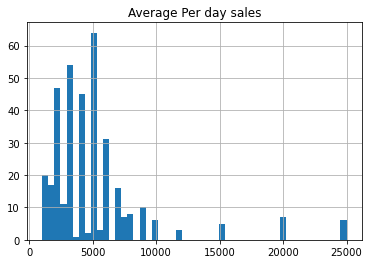

In [45]:
df.hist(column='Average Per day sales', bins=50)

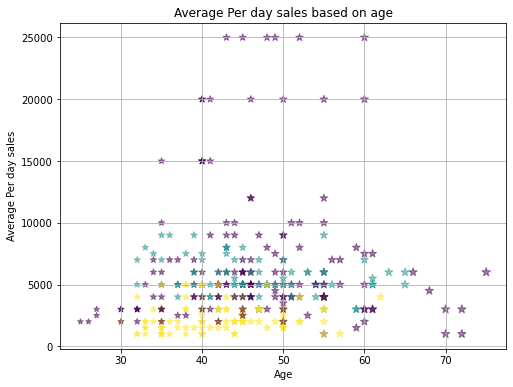

In [201]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 6))
ax_ = fig.add_subplot()

ax_.scatter(df['Age'],df['Average Per day sales'],s=10+df['Age'], alpha=0.5, c=df['District'], marker='*', cmap='viridis')

ax_.set_xlabel('Age')
ax_.set_ylabel('Average Per day sales')
ax_.set_title('Average Per day sales based on age')
ax_.grid(True)

plt.show()

In [152]:
lst = (df["Rank Age"].value_counts()).sort_index()
lst

1     58
2    159
3    131
4     35
Name: Rank Age, dtype: int64

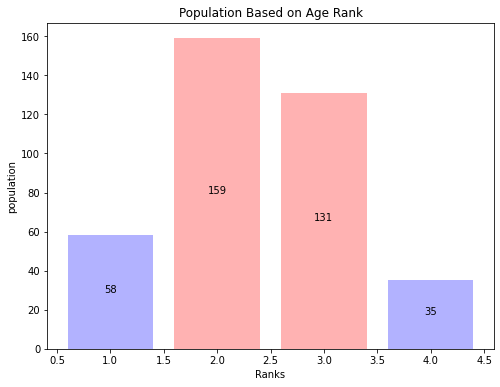

In [196]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot()

x = lst.index
y = lst.values

for x_, y_ in zip(x, y):
    ax.bar(x_, y_, color = "blue" if y_ < y.mean() else "red", alpha = 0.3)
    ax.text(x_, y_ - y_/2, str(y_), horizontalalignment = 'center')

ax.set_ylabel('population')
ax.set_xlabel('Ranks')
ax.set_title("Population Based on Age Rank")

plt.show()

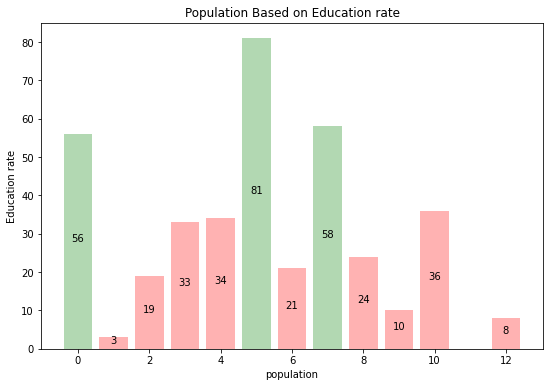

In [203]:
edu = (df["Education"].value_counts()).sort_index()

fig = plt.figure(figsize = (9, 6))
ax1 = fig.add_subplot()

x_1 = edu.index
y_1 = edu.values

for x_, y_ in zip(x_1, y_1):
    ax1.bar(x_, y_, color = "red" if y_ < 50 else "green", alpha = 0.3)
    ax1.text(x_, y_ - y_/2, str(y_), horizontalalignment = 'center')

ax1.set_xlabel('population')
ax1.set_ylabel('Education rate')
ax1.set_title("Population Based on Education rate")

plt.show()

In [246]:
#CREATE A NEW DATAFRAME
gb_df = df[[ "Education Rank","Average Per day sales"]].groupby("Education Rank")

In [247]:
lst1 = []
lst2 = []
colors = ["#543005","#8c510a","#bf812d","#80cdc1","#35978f"]

for _, df_ in gb_df:
    lst1.append(df_["Average Per day sales"].values.tolist())
    lst2.append(list(set(df_["Education Rank"].values.tolist()))[0])

Text(0, 0.5, 'Frequency')

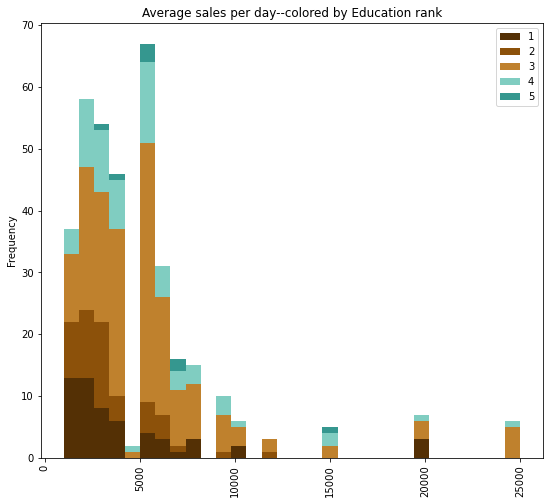

In [248]:
fig = plt.figure(figsize = (9, 8))
ax2 = fig.add_subplot()

n, bins, patches = ax2.hist(lst1, bins = 30, stacked = True, density = False, color = colors)
ax2.tick_params(axis = 'x', labelrotation = 90)

ax2.legend({class_:color for class_, color in zip(lst2, colors)})

ax2.set_title("Average sales per day--colored by Education rank")

ax2.set_ylabel("Frequency")

In [253]:
education_ = (df["Education"].value_counts()).sort_index()
education_

0.0     56
1.0      3
2.0     19
3.0     33
4.0     34
5.0     81
6.0     21
7.0     58
8.0     24
9.0     10
10.0    36
12.0     8
Name: Education, dtype: int64

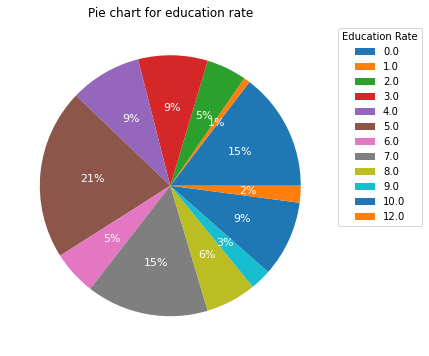

In [263]:
fig = plt.figure(figsize = (18, 6))
ax3 = fig.add_subplot()

ax3.pie(education_.values, labels = education_.index, autopct = '%1.0f%%',textprops = {'fontsize': 11, 'color' : "white"})
ax3.set_title("Pie chart for education rate")
ax3.legend(loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 10, title = "Education Rate")